In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv("C:/Users/ACER/Downloads/archive (1)/drug200.csv")
df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [6]:
stat_desc = df.describe(percentiles=[0.25, 0.5, 0.75]).T
stat_desc

,count,mean,std,min,25%,50%,75%,max
Age,200.0,44.315000,16.544315,15.000,31.0000,45.0000,58.00,74.000
Na_to_K,200.0,16.084485,7.223956,6.269,10.4455,13.9365,19.38,38.247


In [7]:
numeric_df = df.select_dtypes(include=np.number)
numeric_df.head(10)

,Age,Na_to_K
0,23,25.355
1,47,13.093
2,47,10.114
3,28,7.798
4,61,18.043
5,22,8.607
6,49,16.275
7,41,11.037
8,60,15.171
9,43,19.368


In [8]:
print("Jumlah record:", df.shape[0])
print("Jumlah atribut:", df.shape[1])
print("Nama atribut:", df.columns.tolist())
print("Jumlah atribut numerik:", len(numeric_df.columns))

Jumlah record: 200
Jumlah atribut: 6
Nama atribut: ['Age', 'Sex', 'BP', 'Cholesterol', 'Na_to_K', 'Drug']
Jumlah atribut numerik: 2


In [9]:
obj_cols = df.select_dtypes(include='object')

for col in obj_cols.columns:
    print(f"{col} : {df[col].nunique()} label -> {df[col].unique()}")

Sex : 2 label -> ['F' 'M']
BP : 3 label -> ['HIGH' 'LOW' 'NORMAL']
Cholesterol : 2 label -> ['HIGH' 'NORMAL']
Drug : 5 label -> ['DrugY' 'drugC' 'drugX' 'drugA' 'drugB']


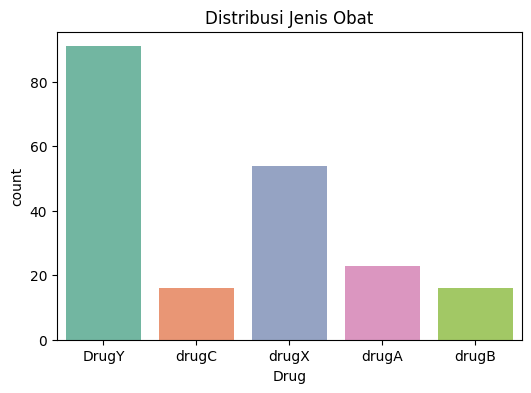

In [13]:
plt.figure(figsize=(6,4))
sns.countplot(data=df, x="Drug", hue="Drug", palette="Set2", legend=False)
plt.title("Distribusi Jenis Obat")
plt.show()

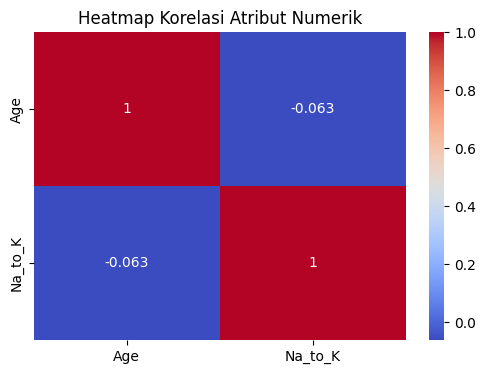

In [14]:
plt.figure(figsize=(6,4))
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm")
plt.title("Heatmap Korelasi Atribut Numerik")
plt.show()

## Kesimpulan Analisis Dataset Drug Classification

Berdasarkan analisis dataset *Drug Classification*:

1. Dataset berisi 200 record dengan 6 atribut, di antaranya 2 atribut numerik (`Age` dan `Na_to_K`) dan 4 atribut kategorikal (`Sex`, `BP`, `Cholesterol`, `Drug`).
2. Statistik deskriptif menunjukkan:
   - Usia (Age) berkisar antara 15 hingga 74 tahun, dengan rata-rata sekitar 44 tahun.
   - Nilai `Na_to_K` (rasio natrium terhadap kalium) bervariasi cukup lebar, dengan rata-rata sekitar 16.
3. Atribut kategorikal memiliki distribusi label yang cukup beragam:
   - Jenis kelamin terbagi seimbang antara pria dan wanita.
   - Tekanan darah (`BP`) terbagi ke dalam tiga kategori: High, Normal, dan Low.
   - Kolesterol terbagi ke dalam dua kategori: High dan Normal.
   - Target kelas (`Drug`) terbagi ke dalam 5 jenis obat yang berbeda.
4. Visualisasi distribusi obat menunjukkan bahwa beberapa jenis obat lebih dominan diberikan dibandingkan yang lain.
5. Heatmap korelasi memperlihatkan bahwa atribut numerik (`Age` dan `Na_to_K`) memiliki korelasi sangat lemah (mendekati 0).

### Kesimpulan Akhir
Dataset ini memperlihatkan variasi dalam usia, tekanan darah, kolesterol, dan rasio Na/K yang digunakan sebagai faktor penentu klasifikasi obat. Tidak ada korelasi kuat antar atribut numerik, sehingga klasifikasi obat kemungkinan lebih dipengaruhi oleh kombinasi faktor kategorikal (BP, Cholesterol, Sex) serta rasio `Na_to_K`.
